### Simple returns and log returns

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

%matplotlib inline

In [2]:
df = pd.DataFrame(index=[2016, 2017, 2018], data=[100,50,95], columns=["Price"])
df

,Price
2016,100
2017,50
2018,95


In [3]:
simple_returns = df.pct_change().dropna()
simple_returns

,Price
2017,-0.5
2018,0.9


In [4]:
# Simple returns doesnt give you the return from the start
simple_returns.mean()

Price    0.2
dtype: float64

In [5]:
# 20% mean return from 2016 will give you
100*1.2*1.2

144.0

In [6]:
# Log Returns
log_returns = np.log(df/df.shift(1)).dropna()
log_returns

,Price
2017,-0.693147
2018,0.641854


In [7]:
log_returns.mean()

Price   -0.025647
dtype: float64

What was the actual return from the start?

In [8]:
# Starting price was 100
# For 2 year period
100*np.exp(log_returns.mean()*2)

Price    95.0
dtype: float64

95 is the price at the end of two years!!!

### Simple Moving Average

In [9]:
SPY = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [10]:
spy = SPY.Close.to_frame()
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2022-04-25,428.510010
2022-04-26,416.100006
2022-04-27,417.269989


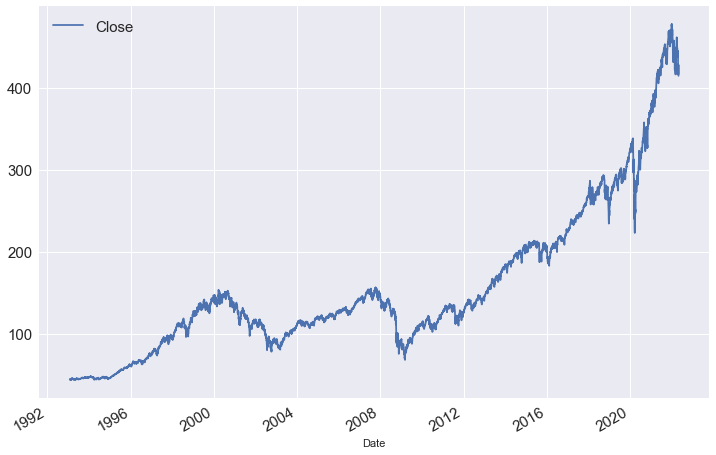

In [11]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [12]:
spy_roll = spy.rolling(window=10)
spy_roll = spy_roll.mean()
# First ten days will be NA as it takes 10 days of data
spy_roll.head(20)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [13]:
# Calculate the median instead of means
spy.rolling(window=10).median().head(20)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [14]:
spy.rolling(window=10).median().tail(10)

,Close
Date,
2022-04-18,444.914993
2022-04-19,444.175003
2022-04-20,444.009995
2022-04-21,441.615005
2022-04-22,439.105011
2022-04-25,438.175003
2022-04-26,438.014999
2022-04-27,437.880005
2022-04-28,433.150009


In [15]:
# Calculate max of the last 10 days
spy.rolling(window=10).max()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2022-04-25,445.040009
2022-04-26,445.040009
2022-04-27,445.040009


In [16]:
# Calculate max of the last 10 days
spy.rolling(window=10, min_periods=5).max().head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,45.00000
1993-02-05,45.00000
1993-02-08,45.00000
1993-02-09,45.00000
1993-02-10,45.00000


In [17]:
# Calcualte 50 day SMA of SPY
spy = SPY.Close.to_frame()
spy["SMA50"] = spy["Close"].rolling(window=50, min_periods=50).mean()
spy.head(52)

,Close,SMA50
Date,,
1993-01-29,43.93750,NaN
1993-02-01,44.25000,NaN
1993-02-02,44.34375,NaN
1993-02-03,44.81250,NaN
1993-02-04,45.00000,NaN
1993-02-05,44.96875,NaN
1993-02-08,44.96875,NaN
1993-02-09,44.65625,NaN
1993-02-10,44.71875,NaN


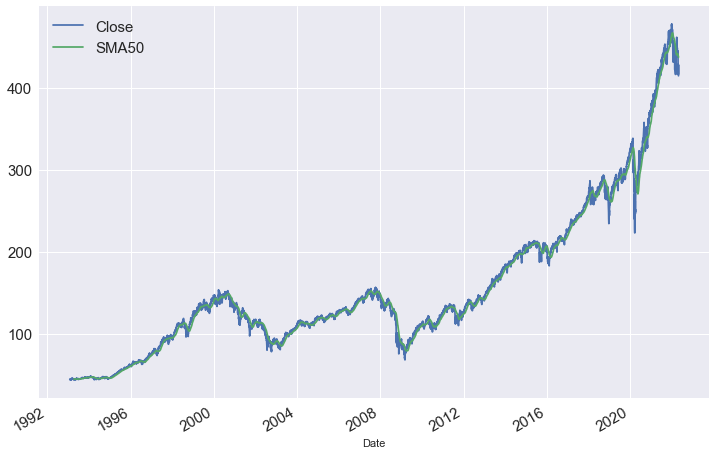

In [18]:
# Plot the SMA and Close Price
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [19]:
# 200 day mean
spy["SMA200"] = spy["Close"].rolling(window=50, min_periods=50).mean()
spy.tail()

,Close,SMA50,SMA200
Date,,,
2022-04-25,428.510010,439.169002,439.169002
2022-04-26,416.100006,438.681802,438.681802
2022-04-27,417.269989,438.246802,438.246802
2022-04-28,427.809998,437.881002,437.881002
2022-04-29,414.605011,437.241102,437.241102


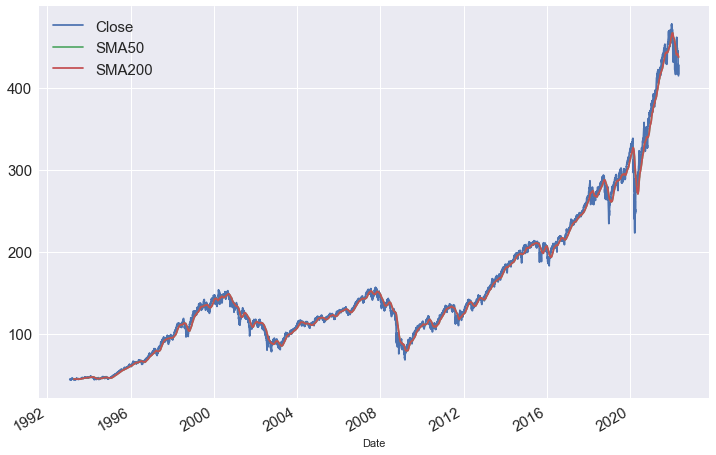

In [20]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [21]:
# 100 day Exponential Moving Average
spy["EMA100"] = spy.Close.ewm(span=100,min_periods=100).mean()
spy


,Close,SMA50,SMA200,EMA100
Date,,,,
1993-01-29,43.937500,NaN,NaN,NaN
1993-02-01,44.250000,NaN,NaN,NaN
1993-02-02,44.343750,NaN,NaN,NaN
1993-02-03,44.812500,NaN,NaN,NaN
1993-02-04,45.000000,NaN,NaN,NaN
...,...,...,...,...
2022-04-25,428.510010,439.169002,439.169002,445.132250
2022-04-26,416.100006,438.681802,438.681802,444.557354
2022-04-27,417.269989,438.246802,438.246802,444.017011


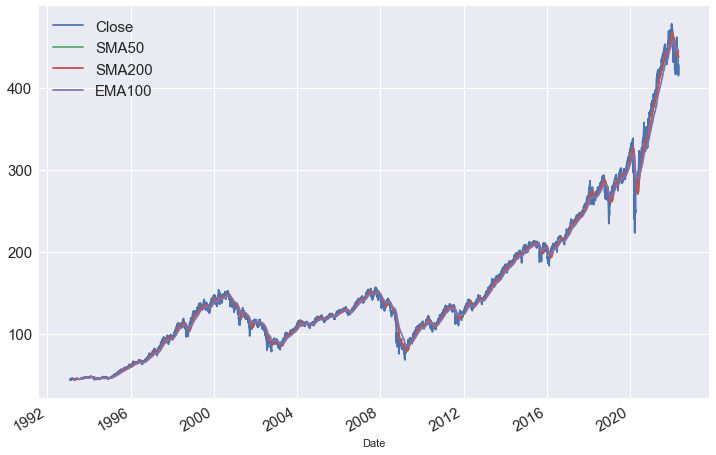

In [22]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [23]:
spy["Day"] = spy.index.day_name()
spy

,Close,SMA50,SMA200,EMA100,Day
Date,,,,,
1993-01-29,43.937500,NaN,NaN,NaN,Friday
1993-02-01,44.250000,NaN,NaN,NaN,Monday
1993-02-02,44.343750,NaN,NaN,NaN,Tuesday
1993-02-03,44.812500,NaN,NaN,NaN,Wednesday
1993-02-04,45.000000,NaN,NaN,NaN,Thursday
...,...,...,...,...,...
2022-04-25,428.510010,439.169002,439.169002,445.132250,Monday
2022-04-26,416.100006,438.681802,438.681802,444.557354,Tuesday
2022-04-27,417.269989,438.246802,438.246802,444.017011,Wednesday


In [24]:
spy["Quarter"] = spy.index.quarter
spy

,Close,SMA50,SMA200,EMA100,Day,Quarter
Date,,,,,,
1993-01-29,43.937500,NaN,NaN,NaN,Friday,1
1993-02-01,44.250000,NaN,NaN,NaN,Monday,1
1993-02-02,44.343750,NaN,NaN,NaN,Tuesday,1
1993-02-03,44.812500,NaN,NaN,NaN,Wednesday,1
1993-02-04,45.000000,NaN,NaN,NaN,Thursday,1
...,...,...,...,...,...,...
2022-04-25,428.510010,439.169002,439.169002,445.132250,Monday,2
2022-04-26,416.100006,438.681802,438.681802,444.557354,Tuesday,2
2022-04-27,417.269989,438.246802,438.246802,444.017011,Wednesday,2


#### Reindex

In [25]:
SPY = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [26]:
spy = SPY.Close.to_frame()
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2022-04-25,428.510010
2022-04-26,416.100006
2022-04-27,417.269989


In [27]:
all_days = pd.date_range(start="2010-12-31", end="2020-01-01", freq="D")
all_days

DatetimeIndex(['2010-12-31', '2011-01-01', '2011-01-02', '2011-01-03',
               '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=3289, freq='D')

In [28]:
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2022-04-25,428.510010
2022-04-26,416.100006
2022-04-27,417.269989


In [29]:
spy = spy.reindex(all_days)
# certain days are public holidays so SPY didnt trade
spy

,Close
2010-12-31,125.750000
2011-01-01,NaN
2011-01-02,NaN
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,NaN
2019-12-29,NaN
2019-12-30,321.079987
2019-12-31,321.859985


In [30]:
# Forward fill
spy.fillna(method="ffill")

,Close
2010-12-31,125.750000
2011-01-01,125.750000
2011-01-02,125.750000
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,322.859985
2019-12-29,322.859985
2019-12-30,321.079987
2019-12-31,321.859985


In [31]:
# Back fill - probably wont use this as much
spy.fillna(method="bfill")

,Close
2010-12-31,125.750000
2011-01-01,127.050003
2011-01-02,127.050003
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,321.079987
2019-12-29,321.079987
2019-12-30,321.079987
2019-12-31,321.859985


In [32]:
# Download weekly data
SPY_wk = yf.download("SPY", interval="1wk")
SPY_wk

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,25.547972,1003200.0
1993-02-01,43.968750,45.093750,43.968750,44.968750,26.147608,2234800.0
1993-02-08,44.968750,45.125000,44.531250,44.593750,25.929560,1159800.0
1993-02-15,44.468750,44.468750,42.812500,43.562500,25.329937,998700.0
1993-02-22,43.687500,44.437500,43.468750,44.406250,25.820534,1024300.0
...,...,...,...,...,...,...
2022-04-04,453.130005,457.829987,443.470001,447.570007,447.570007,398047000.0
2022-04-11,444.109985,445.750000,436.649994,437.790009,437.790009,345925200.0
2022-04-18,436.809998,450.010010,425.440002,426.040009,426.040009,426819600.0


#### Cumulative Returns, Drawdowns
---

In [33]:
aapl = yf.download("AAPL")
aapl = aapl.Close.to_frame()
aapl

[*********************100%***********************]  1 of 1 completed


,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2022-04-25,162.880005
2022-04-26,156.800003
2022-04-27,156.570007


In [34]:
# Daily close price
aapl.Close

Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2022-04-25    162.880005
2022-04-26    156.800003
2022-04-27    156.570007
2022-04-28    163.639999
2022-04-29    159.460007
Name: Close, Length: 10434, dtype: float64

In [35]:
aapl["d_returns"] = np.log(aapl.div(aapl.shift(1)))
aapl

,Close,d_returns
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
...,...,...
2022-04-25,162.880005,0.006715
2022-04-26,156.800003,-0.038043
2022-04-27,156.570007,-0.001468


In [36]:
# Drop all NAs
aapl.dropna(inplace=True)
aapl

,Close,d_returns
Date,,
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
1980-12-19,0.126116,0.059239
...,...,...
2022-04-25,162.880005,0.006715
2022-04-26,156.800003,-0.038043
2022-04-27,156.570007,-0.001468


In [37]:
aapl.d_returns.sum()

7.124803158697883

In [38]:
# How much would $1 invested in 1980 be worth now?
np.exp(aapl.d_returns.sum())

1242.4035866442725

In [39]:
# Cumulative Retuns
aapl["cum_ret"] = aapl.d_returns.cumsum().apply(np.exp)
aapl

,Close,d_returns,cum_ret
Date,,,
1980-12-15,0.121652,-0.053581,0.947829
1980-12-16,0.112723,-0.076231,0.878261
1980-12-17,0.115513,0.024450,0.899998
1980-12-18,0.118862,0.028580,0.926092
1980-12-19,0.126116,0.059239,0.982610
...,...,...,...
2022-04-25,162.880005,0.006715,1269.049879
2022-04-26,156.800003,-0.038043,1221.678653
2022-04-27,156.570007,-0.001468,1219.886683


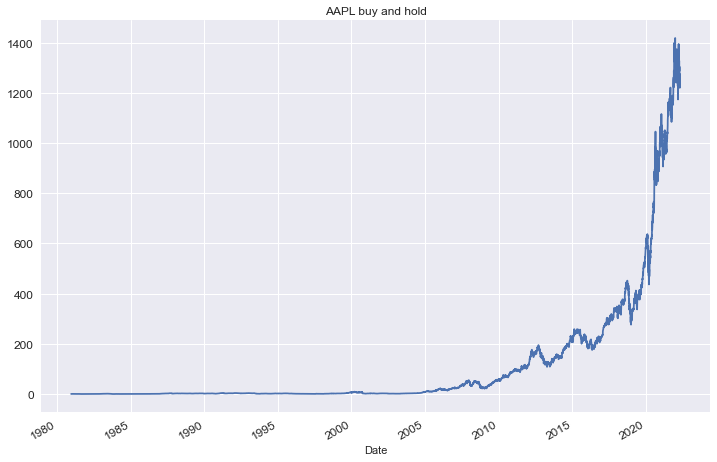

In [40]:
aapl.cum_ret.plot(figsize=(12,8), title="AAPL buy and hold", fontsize=12)
plt.show()

In [41]:
# Annualized average returs
aapl.d_returns.mean()*252

0.17209339557096454

In [42]:
# Annualized Std Dev
aapl.d_returns.std()*np.sqrt(252)

0.45694142960675843

#### How to calculate drawdown

Peak - Valley

In [43]:
# How to calculate drawdowns
aapl["cum_max"] = aapl.cum_ret.cummax()
aapl

,Close,d_returns,cum_ret,cum_max
Date,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829
1980-12-16,0.112723,-0.076231,0.878261,0.947829
1980-12-17,0.115513,0.024450,0.899998,0.947829
1980-12-18,0.118862,0.028580,0.926092,0.947829
1980-12-19,0.126116,0.059239,0.982610,0.982610
...,...,...,...,...
2022-04-25,162.880005,0.006715,1269.049879,1418.097708
2022-04-26,156.800003,-0.038043,1221.678653,1418.097708
2022-04-27,156.570007,-0.001468,1219.886683,1418.097708


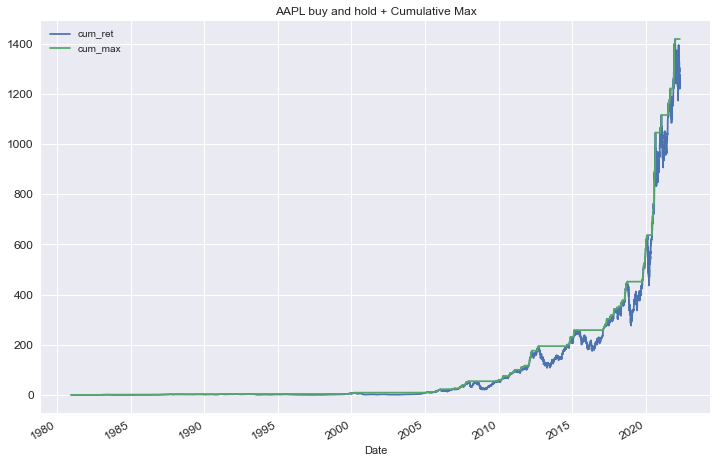

In [44]:
aapl[["cum_ret", "cum_max"]].plot(figsize=(12,8), 
title="AAPL buy and hold + Cumulative Max", 
fontsize=12)
plt.show()

In [45]:
# Calculate the drawdown
aapl["drawdown"] = aapl["cum_max"] - aapl["cum_ret"]
aapl

,Close,d_returns,cum_ret,cum_max,drawdown
Date,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
2022-04-25,162.880005,0.006715,1269.049879,1418.097708,149.047828
2022-04-26,156.800003,-0.038043,1221.678653,1418.097708,196.419055
2022-04-27,156.570007,-0.001468,1219.886683,1418.097708,198.211025


In [47]:
# Calculate Max DrawDown
aapl.drawdown.max()

244.569460582313